In [55]:
# Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display,clear_output

In [56]:
# Importing the Dataset

train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
sample_submission=pd.read_csv("sample_submission.csv")

In [57]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [58]:
test.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


In [59]:
sample_submission.head()

,id,trip_duration
0,id3004672,959
1,id3505355,959
2,id1217141,959
3,id2150126,959
4,id1598245,959


In [60]:
train.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [61]:
test.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
dtype: int64

In [62]:
train.vendor_id=train["vendor_id"].astype("category")
train.store_and_fwd_flag=train["store_and_fwd_flag"].astype("category")
train.pickup_datetime = pd.to_datetime(train.pickup_datetime, format="%Y-%m-%d %H:%M:%S")
# train.dropoff_datetime = pd.to_datetime(train.dropoff_datetime, format="%Y-%m-%d %H:%M:%S")

train["distance"]=111139*abs(train.pickup_longitude-train.dropoff_longitude)+abs(train.pickup_latitude-train.dropoff_latitude)
# train["avg_speed"]=train["distance"]*60*60/(1000*train["trip_duration"])

train['pickup_day_name'] = train['pickup_datetime'].dt.day_name()
# train['dropoff_day_name']= train['dropoff_datetime'].dt.day_name()

train['pickup_time'] = train['pickup_datetime'].dt.hour
# train['dropoff_time'] = train['dropoff_datetime'].dt.hour

cut_bins = [0,5,10,15,20,24]
names = ['Early Morning','Office Hours','Noon Hours','Evening','Night']

train['Pick_time_frame'] = pd.cut(train['pickup_time'],bins=cut_bins,labels=names)
# train['Drop_time_frame'] = pd.cut(train['dropoff_time'],bins=cut_bins,labels=names)

train.pickup_day_name=train["pickup_day_name"].astype("category")
# train.dropoff_day_name=train["dropoff_day_name"].astype("category")

train.dtypes

id                            object
vendor_id                   category
pickup_datetime       datetime64[ns]
dropoff_datetime              object
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag          category
trip_duration                  int64
distance                     float64
pickup_day_name             category
pickup_time                    int64
Pick_time_frame             category
dtype: object

In [63]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,pickup_day_name,pickup_time,Pick_time_frame
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1947.682106,Monday,17,Evening
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2118.967686,Sunday,0,NaN
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2923.693317,Tuesday,11,Noon Hours
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,247.606850,Wednesday,19,Evening
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,14.425385,Saturday,13,Noon Hours


In [64]:
train.trip_duration.describe()

count    1.458644e+06
mean     9.594923e+02
std      5.237432e+03
min      1.000000e+00
25%      3.970000e+02
50%      6.620000e+02
75%      1.075000e+03
max      3.526282e+06
Name: trip_duration, dtype: float64

<AxesSubplot:xlabel='trip_duration', ylabel='Density'>

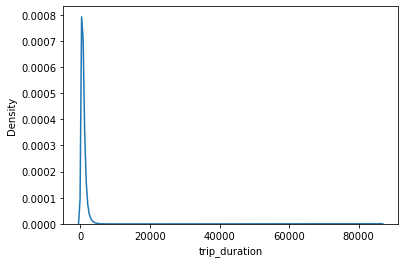

In [65]:
sns.kdeplot(train[train.trip_duration<250000].trip_duration)

In [66]:
train=train[(train.trip_duration<250000)]

In [68]:
test.vendor_id=test["vendor_id"].astype("category")
test.store_and_fwd_flag=test["store_and_fwd_flag"].astype("category")
test.pickup_datetime = pd.to_datetime(test.pickup_datetime, format="%Y-%m-%d %H:%M:%S")
# test.dropoff_datetime = pd.to_datetime(test.dropoff_datetime, format="%Y-%m-%d %H:%M:%S")

test["distance"]=111139*abs(test.pickup_longitude-test.dropoff_longitude)+abs(test.pickup_latitude-test.dropoff_latitude)
# test["avg_speed"]=test["distance"]*60*60/(1000*test["trip_duration"])

test['pickup_day_name'] = test['pickup_datetime'].dt.day_name()
# test['dropoff_day_name']= test['dropoff_datetime'].dt.day_name()

test['pickup_time'] = test['pickup_datetime'].dt.hour
# test['dropoff_time'] = test['dropoff_datetime'].dt.hour

cut_bins = [0,5,10,15,20,24]
names = ['Early Morning','Office Hours','Noon Hours','Evening','Night']

test['Pick_time_frame'] = pd.cut(test['pickup_time'],bins=cut_bins,labels=names)
# test['Drop_time_frame'] = pd.cut(test['dropoff_time'],bins=cut_bins,labels=names)

test.pickup_day_name=test["pickup_day_name"].astype("category")
# test.dropoff_day_name=test["dropoff_day_name"].astype("category")

test.dtypes

id                            object
vendor_id                   category
pickup_datetime       datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag          category
distance                     float64
pickup_day_name             category
pickup_time                    int64
Pick_time_frame             category
dtype: object

In [71]:
train

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,pickup_day_name,pickup_time,Pick_time_frame
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1947.682106,Monday,17,Evening
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2118.967686,Sunday,0,NaN
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2923.693317,Tuesday,11,Noon Hours
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,247.606850,Wednesday,19,Evening
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,14.425385,Saturday,13,Noon Hours
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778,1412.645535,Friday,13,Noon Hours
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655,3418.875828,Sunday,7,Office Hours
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764,5035.029858,Friday,6,Office Hours
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373,827.581165,Tuesday,15,Noon Hours


In [72]:
test

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,distance,pickup_day_name,pickup_time,Pick_time_frame
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N,227.268089,Thursday,23,Night
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N,488.428398,Thursday,23,Night
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N,1253.238667,Thursday,23,Night
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N,3373.928158,Thursday,23,Night
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N,967.486046,Thursday,23,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...
625129,id3008929,1,2016-01-01 00:02:52,1,-74.003464,40.725105,-74.001251,40.733643,N,245.906288,Friday,0,NaN
625130,id3700764,1,2016-01-01 00:01:52,1,-74.006363,40.743782,-73.953407,40.782467,N,5885.474163,Friday,0,NaN
625131,id2568735,1,2016-01-01 00:01:24,2,-73.972267,40.759865,-73.876602,40.748665,N,10632.121193,Friday,0,NaN
625132,id1384355,1,2016-01-01 00:00:28,1,-73.976501,40.733562,-73.854263,40.891788,N,13585.584999,Friday,0,NaN


In [81]:
from sklearn.metrics import mean_squared_log_error as msle
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse


from sklearn.model_selection import train_test_split

import category_encoders as ce

In [73]:
train.drop(columns=["id","pickup_datetime","dropoff_datetime"],inplace=True)
test.drop(columns=["id","pickup_datetime"],inplace=True)

In [74]:
train

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,pickup_day_name,pickup_time,Pick_time_frame
0,2,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1947.682106,Monday,17,Evening
1,1,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2118.967686,Sunday,0,NaN
2,2,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2923.693317,Tuesday,11,Noon Hours
3,2,1,-74.010040,40.719971,-74.012268,40.706718,N,429,247.606850,Wednesday,19,Evening
4,2,1,-73.973053,40.793209,-73.972923,40.782520,N,435,14.425385,Saturday,13,Noon Hours
...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,2,4,-73.982201,40.745522,-73.994911,40.740170,N,778,1412.645535,Friday,13,Noon Hours
1458640,1,1,-74.000946,40.747379,-73.970184,40.796547,N,655,3418.875828,Sunday,7,Office Hours
1458641,2,1,-73.959129,40.768799,-74.004433,40.707371,N,764,5035.029858,Friday,6,Office Hours
1458642,1,1,-73.982079,40.749062,-73.974632,40.757107,N,373,827.581165,Tuesday,15,Noon Hours


In [75]:
test

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,distance,pickup_day_name,pickup_time,Pick_time_frame
0,1,1,-73.988129,40.732029,-73.990173,40.756680,N,227.268089,Thursday,23,Night
1,1,1,-73.964203,40.679993,-73.959808,40.655403,N,488.428398,Thursday,23,Night
2,1,1,-73.997437,40.737583,-73.986160,40.729523,N,1253.238667,Thursday,23,Night
3,2,1,-73.956070,40.771900,-73.986427,40.730469,N,3373.928158,Thursday,23,Night
4,1,1,-73.970215,40.761475,-73.961510,40.755890,N,967.486046,Thursday,23,Night
...,...,...,...,...,...,...,...,...,...,...,...
625129,1,1,-74.003464,40.725105,-74.001251,40.733643,N,245.906288,Friday,0,NaN
625130,1,1,-74.006363,40.743782,-73.953407,40.782467,N,5885.474163,Friday,0,NaN
625131,1,2,-73.972267,40.759865,-73.876602,40.748665,N,10632.121193,Friday,0,NaN
625132,1,1,-73.976501,40.733562,-73.854263,40.891788,N,13585.584999,Friday,0,NaN


In [77]:
train=pd.get_dummies(train,drop_first=True)
train

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,distance,pickup_time,vendor_id_2,store_and_fwd_flag_Y,pickup_day_name_Monday,pickup_day_name_Saturday,pickup_day_name_Sunday,pickup_day_name_Thursday,pickup_day_name_Tuesday,pickup_day_name_Wednesday,Pick_time_frame_Office Hours,Pick_time_frame_Noon Hours,Pick_time_frame_Evening,Pick_time_frame_Night
0,1,-73.982155,40.767937,-73.964630,40.765602,455,1947.682106,17,1,0,1,0,0,0,0,0,0,0,1,0
1,1,-73.980415,40.738564,-73.999481,40.731152,663,2118.967686,0,0,0,0,0,1,0,0,0,0,0,0,0
2,1,-73.979027,40.763939,-74.005333,40.710087,2124,2923.693317,11,1,0,0,0,0,0,1,0,0,1,0,0
3,1,-74.010040,40.719971,-74.012268,40.706718,429,247.606850,19,1,0,0,0,0,0,0,1,0,0,1,0
4,1,-73.973053,40.793209,-73.972923,40.782520,435,14.425385,13,1,0,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,4,-73.982201,40.745522,-73.994911,40.740170,778,1412.645535,13,1,0,0,0,0,0,0,0,0,1,0,0
1458640,1,-74.000946,40.747379,-73.970184,40.796547,655,3418.875828,7,0,0,0,0,1,0,0,0,1,0,0,0
1458641,1,-73.959129,40.768799,-74.004433,40.707371,764,5035.029858,6,1,0,0,0,0,0,0,0,1,0,0,0
1458642,1,-73.982079,40.749062,-73.974632,40.757107,373,827.581165,15,0,0,0,0,0,0,1,0,0,1,0,0


In [78]:
test=pd.get_dummies(test,drop_first=True)
test

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,distance,pickup_time,vendor_id_2,store_and_fwd_flag_Y,pickup_day_name_Monday,pickup_day_name_Saturday,pickup_day_name_Sunday,pickup_day_name_Thursday,pickup_day_name_Tuesday,pickup_day_name_Wednesday,Pick_time_frame_Office Hours,Pick_time_frame_Noon Hours,Pick_time_frame_Evening,Pick_time_frame_Night
0,1,-73.988129,40.732029,-73.990173,40.756680,227.268089,23,0,0,0,0,0,1,0,0,0,0,0,1
1,1,-73.964203,40.679993,-73.959808,40.655403,488.428398,23,0,0,0,0,0,1,0,0,0,0,0,1
2,1,-73.997437,40.737583,-73.986160,40.729523,1253.238667,23,0,0,0,0,0,1,0,0,0,0,0,1
3,1,-73.956070,40.771900,-73.986427,40.730469,3373.928158,23,1,0,0,0,0,1,0,0,0,0,0,1
4,1,-73.970215,40.761475,-73.961510,40.755890,967.486046,23,0,0,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625129,1,-74.003464,40.725105,-74.001251,40.733643,245.906288,0,0,0,0,0,0,0,0,0,0,0,0,0
625130,1,-74.006363,40.743782,-73.953407,40.782467,5885.474163,0,0,0,0,0,0,0,0,0,0,0,0,0
625131,2,-73.972267,40.759865,-73.876602,40.748665,10632.121193,0,0,0,0,0,0,0,0,0,0,0,0,0
625132,1,-73.976501,40.733562,-73.854263,40.891788,13585.584999,0,0,0,0,0,0,0,0,0,0,0,0,0


In [79]:
y_train=train["trip_duration"]
X_train=train.drop(columns="trip_duration")

In [82]:
X_train,X_val,y_train,y_val= train_test_split(X_train,y_train,test_size=0.2,random_state=70)

In [84]:
from sklearn.preprocessing import MinMaxScaler

In [90]:
def submission(test_file,name="sample"):
    sample_submission["trip_duration"]=test_file
    sample_submission.to_csv(name+".csv",index=False)

## DecisionTree Regressor

In [85]:
from sklearn.tree import DecisionTreeRegressor as DTR

In [86]:
tree=DTR()

tree.fit(X_train,np.log1p(y_train))

y_train_pred=np.expm1(tree.predict(X_train))

y_val_pred=np.expm1(tree.predict(X_val))

y_test_pred=np.expm1(tree.predict(test))

np.sqrt(mse(y_train,y_train_pred)),np.sqrt(mse(y_val,y_val_pred))

(3.9880789102553216, 4706.1173172804865)

In [87]:
tree.get_depth()

58

In [91]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [92]:
parameters={'max_depth':range(6,46)}

In [93]:
search=RandomizedSearchCV(DTR(random_state=40),param_distributions=parameters,cv=5,n_iter=20,scoring='neg_mean_squared_error',verbose=5,n_jobs=8)

In [94]:
search.fit(X_train,np.log1p(y_train))

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:   18.7s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:  5.8min
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed: 10.1min finished


RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=40),
                   n_iter=20, n_jobs=8,
                   param_distributions={'max_depth': range(6, 46)},
                   scoring='neg_mean_squared_error', verbose=5)

In [95]:
search.best_estimator_

DecisionTreeRegressor(max_depth=21, random_state=40)

In [96]:
tree=DTR(max_depth=21,random_state=40)

tree.fit(X_train,np.log1p(y_train))

y_train_pred=np.expm1(tree.predict(X_train))

y_val_pred=np.expm1(tree.predict(X_val))

y_test_pred=np.expm1(tree.predict(test))

np.sqrt(mse(y_train,y_train_pred)),np.sqrt(mse(y_val,y_val_pred))

(1810.101095967096, 4268.574946948844)

In [97]:
submission(y_test_pred,"Decision Tree Max_depth=21")

In [12]:
from sklearn.model_selection import cross_val_score

In [47]:
def val_score(alphas):
    
    avg=[]
    std=[]
    
    
    for i in alphas:
        score = cross_val_score(DTR(ccp_alpha=i,random_state=40),scoring='neg_mean_squared_error',X=X_train, y=y_train, cv=5)
        
        avg.append(score.mean())
        std.append(score.std())
        
    return avg,std

In [ ]:
mean,std= val_score(np.linspace(0.001,0.002,2))
df=pd.DataFrame({"i":ccp_alphas,"mean":mean,"std":std})

In [ ]:
mean,std= val_score(ccp_alphas)
df=pd.DataFrame({"i":ccp_alphas,"mean":mean,"std":std})

fig,ax=plt.subplots(1,2,figsize=(14,7))
sns.lineplot(data=df,y="mean",x="i",ax=ax[0])
sns.lineplot(data=df,y="std",x="i",ax=ax[1])

In [ ]:
regressor=DTR()

regressor.fit(X_train,y_train)

y_train_pred=regressor.predict(X_train)

y_test_pred=regressor.predict(X_test)

mse(y_train,y_train_pred),mse(y_test,y_test_pred)

## XGBoost

In [19]:
from xgboost import XGBRegressor

In [22]:
regressor=XGBRegressor()
regressor.fit(X_train,np.log1p(y_train))

y_train_pred=np.expm1(regressor.predict(X_train))

y_test_pred=np.expm1(regressor.predict(X_test))


(66734.56598423052, 118909.8005109815)

In [23]:
np.sqrt(mse(y_train,y_train_pred)),np.sqrt(mse(y_test,y_test_pred))

(258.3303427478672, 344.83300380181345)